# Assignment - Advanced Regression

__Problem Statement -__

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

__Business Goal__

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Step 1: Data Reading and Understanding

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.feature_selection import RFE
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data
housing_data = pd.read_csv('train.csv')
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# inspecting data in each variable
for i in housing_data.columns:
    print(i)
    print(housing_data[i].value_counts())

Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64
LotShape
Reg    925
IR1    48

### Step 2: Data Preparation

In [5]:
# checking the columns which has missing values
housing_data.isnull().sum()[housing_data.isnull().sum().values > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
# dropping columns which has high missing data
housing_data = housing_data.drop(columns=['LotFrontage','Alley','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature'])

In [7]:
# checking the columns which has missing values again
housing_data.isnull().sum()[housing_data.isnull().sum().values > 0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
dtype: int64

In [8]:
# dropping the rows which has the above small number of missing data
housing_data.dropna(inplace=True)

In [9]:
# checking the columns which has missing values again
housing_data.isnull().sum()[housing_data.isnull().sum().values > 0]

Series([], dtype: int64)

In [10]:
# We don't need the column id for our analysis, so we will drop it
housing_data.drop(columns='Id', inplace=True)

In [11]:
# the dataset now has no null values, checking the final dataset
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1412 non-null   int64  
 1   MSZoning       1412 non-null   object 
 2   LotArea        1412 non-null   int64  
 3   Street         1412 non-null   object 
 4   LotShape       1412 non-null   object 
 5   LandContour    1412 non-null   object 
 6   Utilities      1412 non-null   object 
 7   LotConfig      1412 non-null   object 
 8   LandSlope      1412 non-null   object 
 9   Neighborhood   1412 non-null   object 
 10  Condition1     1412 non-null   object 
 11  Condition2     1412 non-null   object 
 12  BldgType       1412 non-null   object 
 13  HouseStyle     1412 non-null   object 
 14  OverallQual    1412 non-null   int64  
 15  OverallCond    1412 non-null   int64  
 16  YearBuilt      1412 non-null   int64  
 17  YearRemodAdd   1412 non-null   int64  
 18  RoofStyl

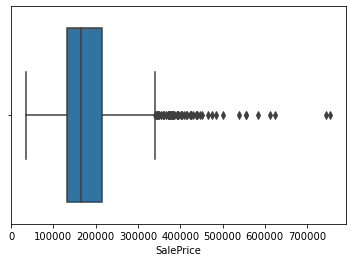

In [12]:
# checking for outliers in the target variable - SalePrice
sns.boxplot(housing_data.SalePrice)
plt.show()

In [13]:
# we can see there are some outliers in the above box plot, mostly above 350000
# checking how many oultliers are there
len(housing_data[housing_data.SalePrice > 350000].SalePrice)

53

In [14]:
# since there are around 53 rows which are outliers and might mislead the analysis, we will drop this
housing_data = housing_data[housing_data.SalePrice < 350000]

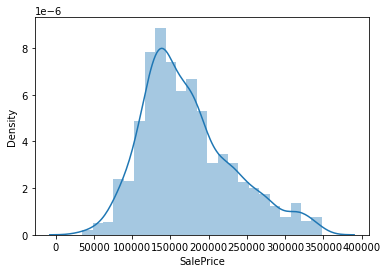

In [15]:
# checking the distribution of the target variable - SalePrice
sns.distplot(housing_data.SalePrice)
plt.show()

In [16]:
# checking out all numeric (float and int) variables in the dataset
housing_data_num = housing_data.select_dtypes(include=['float64', 'int64'])
housing_data_num.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [17]:
# checking the co-relation between the numeric variables
housing_data_num.corr() 

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.147737,0.073595,-0.074288,0.049884,0.058415,0.046744,-0.047832,-0.065351,-0.136899,...,-0.001448,0.000145,-0.019529,-0.044350,-0.035057,0.007485,-0.024130,-0.019686,-0.024594,-0.056663
LotArea,-0.147737,1.000000,0.070663,0.008710,0.002629,0.010788,0.091947,0.202427,0.056834,0.009398,...,0.177201,0.103547,-0.015162,0.032608,0.041633,0.098777,0.054660,0.002762,-0.030035,0.250151
OverallQual,0.073595,0.070663,1.000000,-0.102829,0.561084,0.522252,0.326265,0.125106,-0.066989,0.274882,...,0.187501,0.283806,-0.115233,0.028979,0.044715,0.050353,-0.020568,0.070423,-0.027165,0.779857
OverallCond,-0.074288,0.008710,-0.102829,1.000000,-0.375675,0.076362,-0.127333,-0.029725,0.035971,-0.163269,...,-0.003856,-0.039614,0.076002,0.028758,0.041118,0.001085,0.070630,-0.007695,0.057007,-0.067551
YearBuilt,0.049884,0.002629,0.561084,-0.375675,1.000000,0.580546,0.282447,0.206388,-0.047634,0.128111,...,0.208290,0.176219,-0.398725,0.025968,-0.048852,-0.001057,-0.025916,0.007579,-0.021259,0.560504
YearRemodAdd,0.058415,0.010788,0.522252,0.076362,0.580546,1.000000,0.123533,0.069863,-0.067954,0.151645,...,0.183469,0.206428,-0.199620,0.034582,-0.054597,0.002172,0.002351,0.014982,0.028692,0.532644
MasVnrArea,0.046744,0.091947,0.326265,-0.127333,0.282447,0.123533,1.000000,0.212889,-0.068556,0.070071,...,0.105864,0.117694,-0.112723,0.013467,0.065339,0.025923,-0.024477,0.005577,-0.011525,0.355466
BsmtFinSF1,-0.047832,0.202427,0.125106,-0.029725,0.206388,0.069863,0.212889,1.000000,-0.065800,-0.581121,...,0.172683,0.082197,-0.106125,0.013673,0.066708,0.127669,0.014680,-0.027663,0.016733,0.275460
BsmtFinSF2,-0.065351,0.056834,-0.066989,0.035971,-0.047634,-0.067954,-0.068556,-0.065800,1.000000,-0.235557,...,0.082034,0.009991,0.038728,-0.029186,0.089060,0.047637,0.006213,-0.016423,0.026858,-0.007401
BsmtUnfSF,-0.136899,0.009398,0.274882,-0.163269,0.128111,0.151645,0.070071,-0.581121,-0.235557,1.000000,...,-0.046380,0.111396,-0.010889,0.032055,-0.033566,-0.034955,-0.017329,0.048054,-0.037229,0.185278


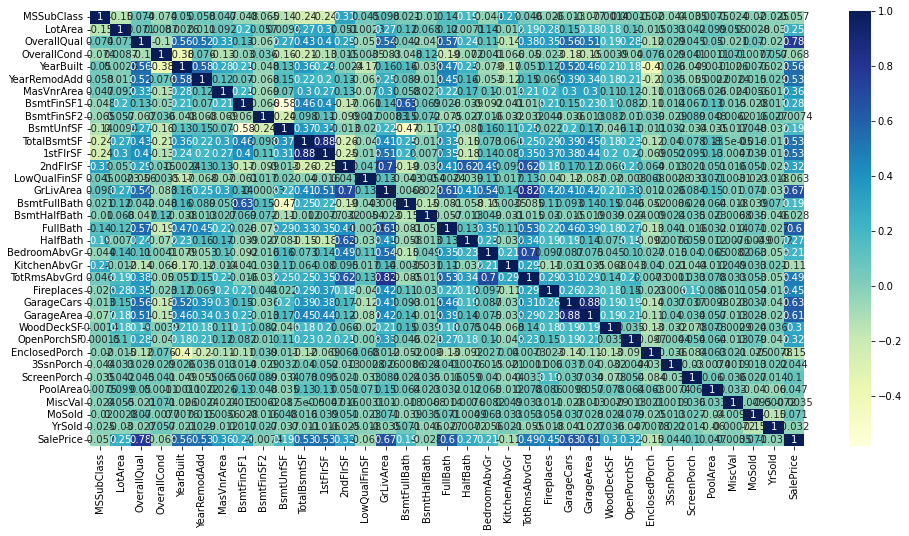

In [18]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(housing_data_num.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [19]:
housing_data_num.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,...,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,57.457627,10174.519528,6.031688,5.611643,1970.322771,1984.442889,92.470892,429.471629,48.595431,573.395726,...,92.016212,45.786293,22.521002,3.198968,15.086957,2.559322,42.957996,6.319823,2007.809138,172367.983051
std,42.752623,8411.676598,1.263172,1.114511,30.180365,20.470693,161.413950,429.162516,164.521132,424.387437,...,122.785678,66.189691,61.645280,28.596474,55.532032,38.875610,504.721456,2.704633,1.328041,59751.293593
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7500.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,245.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,50.000000,9353.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,384.000000,0.000000,490.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,11341.000000,7.000000,6.000000,1999.000000,2003.000000,148.000000,695.000000,0.000000,811.000000,...,168.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,206300.000000
max,190.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,1474.000000,2042.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,348000.000000


In [20]:
# checking out all categorical variables in the dataset
housing_data_catg = housing_data.select_dtypes(include=['object'])
housing_data_catg.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal


In [21]:
# creating dummy variables for all categorical variables
housing_data_dummy = pd.get_dummies(housing_data_catg, drop_first=True)
housing_data_dummy.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [22]:
# droping the categorical variables from the main dataset
housing_data.drop(columns=housing_data_catg.columns, inplace=True)

# concatenating the dummy dateaset with the main dataset
housing_data = pd.concat([housing_data, housing_data_dummy], axis=1)
housing_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [23]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 0 to 1459
Columns: 212 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(1), int64(34), uint8(177)
memory usage: 616.2 KB


In [24]:
# creating train and test dataset
housing_data_train, housing_data_test = train_test_split(housing_data, train_size=0.7, test_size = 0.3, random_state=100)
print(housing_data_train.shape)
print(housing_data_test.shape)

(949, 212)
(408, 212)


In [25]:
# scaling the numeric features 
scaler = MinMaxScaler()

cols = housing_data_num.columns
housing_data_train[cols] = scaler.fit_transform(housing_data_train[cols])
housing_data_train.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,...,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,0.226957,0.053717,0.556492,0.575606,0.714244,0.569845,0.059268,0.184234,0.033902,0.280842,...,0.003161,0.003161,0.063224,0.003161,0.887250,0.002107,0.005269,0.014752,0.841939,0.063224
std,0.257710,0.055630,0.141705,0.138915,0.220628,0.342538,0.101482,0.175704,0.118522,0.204061,...,0.056165,0.056165,0.243495,0.056165,0.316454,0.045883,0.072433,0.120624,0.364991,0.243495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.037378,0.444444,0.500000,0.591241,0.266667,0.000000,0.000000,0.000000,0.120960,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.049198,0.555556,0.500000,0.722628,0.716667,0.000000,0.163717,0.000000,0.242409,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.294118,0.060817,0.666667,0.625000,0.927007,0.883333,0.100000,0.298230,0.000000,0.397160,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# creating X_train and y_train
X_train = housing_data_train.drop(columns=['SalePrice'])
y_train = housing_data_train.SalePrice
print(X_train.shape)
print(y_train.shape)

(949, 211)
(949,)


In [27]:
X_train.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,...,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,0.226957,0.053717,0.556492,0.575606,0.714244,0.569845,0.059268,0.184234,0.033902,0.280842,...,0.003161,0.003161,0.063224,0.003161,0.887250,0.002107,0.005269,0.014752,0.841939,0.063224
std,0.257710,0.055630,0.141705,0.138915,0.220628,0.342538,0.101482,0.175704,0.118522,0.204061,...,0.056165,0.056165,0.243495,0.056165,0.316454,0.045883,0.072433,0.120624,0.364991,0.243495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.037378,0.444444,0.500000,0.591241,0.266667,0.000000,0.000000,0.000000,0.120960,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.049198,0.555556,0.500000,0.722628,0.716667,0.000000,0.163717,0.000000,0.242409,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.294118,0.060817,0.666667,0.625000,0.927007,0.883333,0.100000,0.298230,0.000000,0.397160,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
# rescaling and creating X_test and y_test
housing_data_test[cols] = scaler.transform(housing_data_test[cols])

X_test = housing_data_test.drop(columns=['SalePrice'])
y_test = housing_data_test.SalePrice
print(X_test.shape)
print(y_test.shape)

(408, 211)
(408,)


In [29]:
X_test.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,...,408.000000,408.000000,408.000000,408.0,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,0.204945,0.055739,0.565087,0.578431,0.725687,0.583824,0.054367,0.203516,0.030797,0.280706,...,0.002451,0.004902,0.075980,0.0,0.872549,0.002451,0.004902,0.014706,0.821078,0.083333
std,0.235964,0.040281,0.137137,0.140388,0.219578,0.338211,0.099517,0.219027,0.093700,0.216598,...,0.049507,0.069928,0.265292,0.0,0.333887,0.049507,0.069928,0.120521,0.383757,0.276725
min,0.000000,0.002326,0.111111,0.125000,0.058394,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.039520,0.444444,0.500000,0.598540,0.316667,0.000000,0.000000,0.000000,0.112512,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.049865,0.555556,0.500000,0.751825,0.716667,0.000000,0.178540,0.000000,0.234574,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.294118,0.063326,0.666667,0.625000,0.934307,0.900000,0.082969,0.324447,0.000000,0.398874,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,0.425202,1.000000,1.000000,1.000000,1.000000,0.705625,2.497345,0.589552,0.932909,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 3: Model Building and Evaluation

In [30]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [31]:
rfe = RFE(lm, n_features_to_select=40, step=1) 
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 40),
 ('MasVnrArea', False, 39),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 8),
 ('BsmtUnfSF', False, 14),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 16),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 63),
 ('BsmtHalfBath', False, 119),
 ('FullBath', False, 69),
 ('HalfBath', False, 131),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 97),
 ('Fireplaces', False, 42),
 ('GarageCars', False, 27),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 26),
 ('OpenPorchSF', False, 28),
 ('EnclosedPorch', False, 120),
 ('3SsnPorch', False, 51),
 ('ScreenPorch', False, 56),
 ('PoolArea', False, 64),
 ('MiscVal', False, 29),
 ('MoSold', False, 147),
 ('YrSold', False, 166),
 ('MSZoning_FV', False, 92),
 ('MSZoning_RH', False, 78),
 ('MSZoning_RL', F

In [32]:
# storing the columns selected by RFE

col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'Street_Pave',
       'LandSlope_Sev', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Condition1_PosA', 'Condition1_RRAe', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'BldgType_2fmCon',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_WdShake',
       'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtCond_Po', 'Heating_OthW', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'Functional_Sev', 'SaleType_Con'],
      dtype='object')

In [33]:
X_train_rfe = X_train[col]

# adding constant since statsmodel doesn't do it automatically
X_train_rfe_sm = sm.add_constant(X_train_rfe)

# building the model
lr = sm.OLS(y_train, X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     233.8
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:07:32   Log-Likelihood:                 1369.8
No. Observations:                 949   AIC:                            -2660.
Df Residuals:                     909   BIC:                            -2465.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0921      0.050     -1.858      0.063      -0.189       0.005
MSSubClass              -0.0638      0.010     -6.265      0.000      -0.084      -0.044
LotArea                  0.5015      0.055      9.130      0.000       0.394       0.609
OverallQual              0.2861      0.024     12.097      0.000       0.240       0.333
OverallCond              0.1577      0.016      9.648      0.000       0.126       0.190
YearBuilt                0.1973      0.016     12.208      0.000       0.166       0.229
BsmtFinSF1               0.1069      0.013      8.523      0.000       0.082       0.131
TotalBsmtSF              0.2172      0.041      5.315      0.000       0.137       0.297
1stFlrSF                 0.2046      0.138      1.486      0.138      -0.066       0.475
2ndFlrSF                 0.1985      0.091      2.183      0.029       0.020       0.377
GrLivArea                0.3437      0.210      1.634      0.103      -0.069       0.756
BedroomAbvGr            -0.1115      0.027     -4.116      0.000      -0.165      -0.058
KitchenAbvGr            -0.1029      0.022     -4.652      0.000      -0.146      -0.059
GarageArea               0.1198      0.017      6.948      0.000       0.086       0.154
Street_Pave              0.1023      0.032      3.237      0.001       0.040       0.164
LandSlope_Sev           -0.1994      0.039     -5.160      0.000      -0.275      -0.124
Neighborhood_Crawfor     0.0625      0.011      5.600      0.000       0.041       0.084
Neighborhood_NoRidge     0.0811      0.014      5.961      0.000       0.054       0.108
Condition1_PosA         -0.0842      0.031     -2.723      0.007      -0.145      -0.024
Condition1_RRAe         -0.0694      0.024     -2.885      0.004      -0.117      -0.022
Condition2_PosA          0.1414      0.060      2.353      0.019       0.023       0.259
Condition2_PosN         -1.1840      0.063    -18.663      0.000      -1.309      -1.060
Condition2_RRAe         -0.0483      0.030     -1.614      0.107      -0.107       0.010
BldgType_2fmCon          0.0618      0.016      3.896      0.000       0.031       0.093
RoofStyle_Shed          -0.0483      0.030     -1.614      0.107      -0.107       0.010
RoofMatl_CompShg        -0.0865      0.027     -3.200      0.001      -0.140      -0.033
RoofMatl_Membran         0.2077      0.070      2.953      0.003       0.070       0.346
RoofMatl_Metal           0.1873      0.071      2.620      0.009       0.047       0.328
RoofMatl_Roll           -0.0921      0.065     -1.411      0.159      -0.220       0.036
RoofMatl_WdShake        -0.0863      0.045     -1.935      0.053      -0.174       0.001
Foundation_Wood         -0.0966      0.034     -2.812      0.005      -0.164      -0.029
BsmtQual_Fa             -0.0781      0.018     -4.438    

In [34]:
# We can consider the above selected variables to be a good selection for now, since all p value for all the 
# variables are 0
X_train = X_train_rfe

# Building the model again
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [35]:
# Printing the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.09208936704354692
[-0.06378186  0.50148928  0.28611134  0.15766353  0.19734044  0.10688331
  0.2172398   0.20463696  0.19853034  0.34365742 -0.11154999 -0.10285806
  0.11980804  0.10231737 -0.19935356  0.0625451   0.08108436 -0.08420253
 -0.06937933  0.14141276 -1.18404395 -0.048281    0.06181412 -0.048281
 -0.0864892   0.20773965  0.18730272 -0.09208246 -0.08634073 -0.09659487
 -0.07813121 -0.05749908 -0.07199891  0.31497947 -0.09802439 -0.08616256
 -0.07724998 -0.09868065 -0.37866302  0.15378766]


In [36]:
# keeping the same variables for X_test
X_test = X_test[X_train_rfe.columns]
print(X_test.shape)

(408, 40)


In [37]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9093496731828326
0.6071749480896574
3.097522803303618
6.016645172411079
0.003263986094102864
0.014746679344144802


#### Ridge Regression

In [38]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.005,  0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0 ]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 22 candidates, totalling 220 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [39]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.2}


In [40]:
#Fitting Ridge model for alpha and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.06815341  0.37964246  0.29108926  0.15166478  0.18895757  0.1057103
  0.19862954  0.2402258   0.21344071  0.26848541 -0.0851245  -0.09798375
  0.12777554  0.09092819 -0.10900882  0.06518357  0.08633312 -0.07377847
 -0.0652076   0.12375963 -0.93905078 -0.03751398  0.06502902 -0.03751398
 -0.0721406   0.13001494  0.10372082 -0.06281927 -0.0657711  -0.08485869
 -0.07872841 -0.05591715 -0.07238907  0.19097247 -0.08860094 -0.08900186
 -0.07342895 -0.09822762 -0.29335102  0.14332065]


In [41]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9071240050423987
0.6441620948986683
3.1735739115526242
5.450137162783204
0.003344124248211406
0.013358179320547068


#### Lasso Regression

In [42]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 22 candidates, totalling 220 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [43]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.005}


In [44]:
#Fitting Lasso model for alpha and printing coefficients which have been penalised

alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.005)

In [45]:
lasso.coef_

array([-0.00414328,  0.        ,  0.33629679,  0.        ,  0.04374389,
        0.04269538,  0.        ,  0.03327017,  0.        ,  0.27722566,
        0.        , -0.        ,  0.13025409,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.04411007, -0.        , -0.        ,
       -0.        ,  0.        , -0.07127377, -0.        ,  0.        ])

In [46]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.7217230302996251
0.6898468324784572
9.508727541817317
4.750413826718987
0.010019733974517721
0.011643171143919084


##### Observing the changes in the coefficients after regularization

In [47]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [48]:
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
MSSubClass,-0.063782,-0.068153,-0.004143
LotArea,0.501489,0.379642,0.000000
OverallQual,0.286111,0.291089,0.336297
OverallCond,0.157664,0.151665,0.000000
YearBuilt,0.197340,0.188958,0.043744
BsmtFinSF1,0.106883,0.105710,0.042695
TotalBsmtSF,0.217240,0.198630,0.000000
1stFlrSF,0.204637,0.240226,0.033270
2ndFlrSF,0.198530,0.213441,0.000000
GrLivArea,0.343657,0.268485,0.277226


##### Comparing the metrices

In [49]:
metrices = pd.DataFrame(index=['R2 Train','R2 Test','RSS Train','RSS Test','MSE Train','MSE Test'])
metrices['Linear'] = metric
metrices['Ridge'] = metric2
metrices['Lasso'] = metric3
metrices

,Linear,Ridge,Lasso
R2 Train,0.909350,0.907124,0.721723
R2 Test,0.607175,0.644162,0.689847
RSS Train,3.097523,3.173574,9.508728
RSS Test,6.016645,5.450137,4.750414
MSE Train,0.057131,0.057828,0.100099
MSE Test,0.121436,0.115578,0.107904


__By comparing the above metrices we can say, the Lasso model performs well on the unseen test data.__

__The variables selected by Lasso describes 72.17% of the Sale Price in the train dataset and 68.98% of the Sale Price in the test dataset__

__Variables that are significant in predicting house price are at a descending order-__

In [50]:
betas[(betas.Lasso>0) | (betas.Lasso<0)].sort_values('Lasso', ascending=False).index

Index(['OverallQual', 'GrLivArea', 'GarageArea', 'YearBuilt', 'BsmtFinSF1',
       '1stFlrSF', 'MSSubClass', 'BsmtQual_TA', 'KitchenQual_TA'],
      dtype='object')

__The optimal value of lambda for ridge regression is 0.2 and lasso regression is 0.005__

#### Performing Ridge and Lasso Regression with double the optimal value of lambda/alpha

In [51]:
#Fitting Ridge model for alpha = 0.4
alpha = 0.4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.07020142  0.31385484  0.29342157  0.14779407  0.18348107  0.10490483
  0.18805935  0.23827106  0.20764016  0.25323894 -0.06668247 -0.09378276
  0.13311437  0.08265916 -0.06352913  0.06679525  0.08956279 -0.06616905
 -0.06214245  0.109936   -0.77811799 -0.03099588  0.06576727 -0.03099588
 -0.06284893  0.09541323  0.06852428 -0.04661472 -0.05246521 -0.07623926
 -0.07910321 -0.05480335 -0.07273035  0.13300662 -0.08097703 -0.09069881
 -0.07066359 -0.09795528 -0.23904349  0.13343629]


In [52]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9035007201956939
0.6629866038612333
3.2973816001687775
5.161814433818156
0.003474585458555087
0.012651505965240579


In [53]:
#Fitting Lasso model for alpha = 0.01

alpha = 0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [54]:
lasso.coef_

array([-0.        ,  0.        ,  0.21531628,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.03713003,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.0705391 , -0.        , -0.        ,
       -0.        ,  0.        , -0.09848618, -0.        ,  0.        ])

In [55]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.49570041907709494
0.5074843464037855
17.23192299963477
7.543541113622473
0.018157979978540326
0.018489071356917824


In [56]:
# Observing the coefficients
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [57]:
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
MSSubClass,-0.063782,-0.070201,-0.000000
LotArea,0.501489,0.313855,0.000000
OverallQual,0.286111,0.293422,0.215316
OverallCond,0.157664,0.147794,0.000000
YearBuilt,0.197340,0.183481,0.000000
BsmtFinSF1,0.106883,0.104905,0.000000
TotalBsmtSF,0.217240,0.188059,0.000000
1stFlrSF,0.204637,0.238271,0.000000
2ndFlrSF,0.198530,0.207640,0.000000
GrLivArea,0.343657,0.253239,0.000000


In [58]:
metrices = pd.DataFrame(index=['R2 Train','R2 Test','RSS Train','RSS Test','MSE Train','MSE Test'])
metrices['Linear'] = metric
metrices['Ridge'] = metric2
metrices['Lasso'] = metric3
metrices

,Linear,Ridge,Lasso
R2 Train,0.909350,0.903501,0.495700
R2 Test,0.607175,0.662987,0.507484
RSS Train,3.097523,3.297382,17.231923
RSS Test,6.016645,5.161814,7.543541
MSE Train,0.057131,0.058946,0.134752
MSE Test,0.121436,0.112479,0.135975


In [59]:
# Variables that are significant -
betas[(betas.Lasso>0) | (betas.Lasso<0)].sort_values('Lasso', ascending=False).index

Index(['OverallQual', 'GarageArea', 'BsmtQual_TA', 'KitchenQual_TA'], dtype='object')

__Building the Lasso Model again without the 5 most important predictor variables__

In [60]:
print(X_train.shape)
print(X_test.shape)
# droping the 5 most important predictor variables
X_train = X_train.drop(columns=['OverallQual', 'GrLivArea', 'GarageArea', 'YearBuilt', 'BsmtFinSF1'])
X_test = X_test.drop(columns=['OverallQual', 'GrLivArea', 'GarageArea', 'YearBuilt', 'BsmtFinSF1'])
print(X_train.shape)
print(X_test.shape)

(949, 40)
(408, 40)
(949, 35)
(408, 35)


In [61]:
#Fitting Lasso model again without the 5 most important predictor variables for optimal alpha = 0.005

alpha = 0.005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.005)

In [62]:
lasso.coef_

array([-0.        ,  0.        ,  0.        ,  0.06252791,  0.37394156,
        0.17621659,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.08618501, -0.        , -0.        ,
       -0.04005444,  0.        , -0.10896639, -0.        ,  0.        ])

In [63]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.6260986594080507
0.6051058801707607
12.776213493474364
6.048335736556824
0.013462817169098381
0.014824352295482412


In [64]:
# Observing the coefficients
coeff = pd.DataFrame(index=X_train.columns)
coeff['Lasso'] = lasso.coef_

In [65]:
pd.set_option('display.max_rows', None)
coeff

,Lasso
MSSubClass,-0.000000
LotArea,0.000000
OverallCond,0.000000
TotalBsmtSF,0.062528
1stFlrSF,0.373942
2ndFlrSF,0.176217
BedroomAbvGr,0.000000
KitchenAbvGr,-0.000000
Street_Pave,0.000000
LandSlope_Sev,0.000000


In [66]:
# Variables that are most significant now
coeff[(coeff.Lasso>0) | (coeff.Lasso<0)].sort_values('Lasso', ascending=False).index

Index(['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'KitchenQual_Fa', 'BsmtQual_TA',
       'KitchenQual_TA'],
      dtype='object')